In [2]:
import os
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
pth = os.path.join('..', '..', 'data', 'modeling', 'predict')
adata = sc.read_h5ad(os.path.join(pth, 'CCCA.h5ad')); adata

AnnData object with n_obs × n_vars = 1406087 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'core

In [4]:
# mean(std_z), std(std_z) (diseases)
keys = ['Disease', 'source', 'sample']
df = (adata.obs.groupby(keys, observed = True)
      .latent_z.std().to_frame()
      .groupby('Disease', observed = True)
      .agg({'latent_z' : ['mean', 'std']}))
df.columns = ['mean(std_z)', 'std(std_z)']

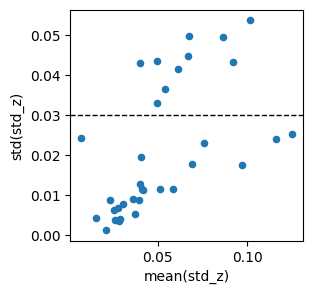

In [5]:
thresh = .03
df.plot(kind = 'scatter',
        x = 'mean(std_z)',
        y = 'std(std_z)',
        figsize = (3, 3))
plt.axhline(thresh,
            c = 'k',
            ls = '--',
            lw = 1)
plt.show()

In [7]:
(df.loc[df['std(std_z)'] < thresh]
 .sort_values('mean(std_z)', ascending = False)
 ['mean(std_z)'].head())

Disease
Pediatric Brain Cancer      0.125049
IDH-Mutant Glioma           0.116195
Chronic Myeloid Leukemia    0.097051
Synovial Sarcoma            0.075694
Hepatocellular Carcinoma    0.069040
Name: mean(std_z), dtype: float32